In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay as roc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import os
import xgboost



In [12]:
data = pd.read_csv('heart.csv')


In [13]:
y = data["target"].copy()
X = data.drop("target", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred_train = lr.predict(X_train)
lr_acc_score_train = accuracy_score(y_train, lr_pred_train)
print("Train Accuracy of Logistic Regression =", lr_acc_score_train, '\n')

lr_pred_test = lr.predict(X_test)
lr_acc_score_test = accuracy_score(y_test, lr_pred_test)
print("Test Accuracy of Logistic Regression =", lr_acc_score_test, '\n')

lr_conf_matrix = confusion_matrix(y_test, lr_pred_test)
print("Confusion Matrix")
print(lr_conf_matrix, '\n')


Train Accuracy of Logistic Regression = 0.8636363636363636 

Test Accuracy of Logistic Regression = 0.8524590163934426 

Confusion Matrix
[[25  4]
 [ 5 27]] 



In [15]:
svm_clf = SVC(kernel='poly', degree=3, coef0=2, C=8)
svm_clf.fit(X_train, y_train)
svm_pred_train = svm_clf.predict(X_train)
svm_acc_score_train = accuracy_score(y_train, svm_pred_train)
print("Train Accuracy of Support Vector Classifier =", svm_acc_score_train, '\n')

svm_pred_test = svm_clf.predict(X_test)
svm_acc_score_test = accuracy_score(y_test, svm_pred_test)
print("Test Accuracy of Support Vector Classifier =", svm_acc_score_test, '\n')

svm_conf_matrix = confusion_matrix(y_test, svm_pred_test)
print("Confusion Matrix")
print(svm_conf_matrix, '\n')


Train Accuracy of Support Vector Classifier = 0.9958677685950413 

Test Accuracy of Support Vector Classifier = 0.7868852459016393 

Confusion Matrix
[[24  5]
 [ 8 24]] 



In [16]:
rf = RandomForestClassifier(n_estimators=39, max_depth=9, random_state=42)
rf.fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_acc_score_train = accuracy_score(y_train, rf_pred_train)
print("Train Accuracy of Random Forest =", rf_acc_score_train, '\n')

rf_pred_test = rf.predict(X_test)
rf_acc_score_test = accuracy_score(y_test, rf_pred_test)
print("Test Accuracy of Random Forest =", rf_acc_score_test, '\n')

rf_conf_matrix = confusion_matrix(y_test, rf_pred_test)
print("Confusion Matrix")
print(rf_conf_matrix, '\n')


Train Accuracy of Random Forest = 0.9958677685950413 

Test Accuracy of Random Forest = 0.8360655737704918 

Confusion Matrix
[[24  5]
 [ 5 27]] 



In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_pred_train = knn.predict(X_train)
knn_acc_score_train = accuracy_score(y_train, knn_pred_train)
print("Train Accuracy of K-Nearest Neighbors Classifier =", knn_acc_score_train, '\n')

knn_pred_test = knn.predict(X_test)
knn_acc_score_test = accuracy_score(y_test, knn_pred_test)
print("Test Accuracy of K-Nearest Neighbors Classifier =", knn_acc_score_test, '\n')

knn_conf_matrix = confusion_matrix(y_test, knn_pred_test)
print("Confusion Matrix")
print(knn_conf_matrix, '\n')


Train Accuracy of K-Nearest Neighbors Classifier = 1.0 

Test Accuracy of K-Nearest Neighbors Classifier = 0.8524590163934426 

Confusion Matrix
[[26  3]
 [ 6 26]] 



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [18]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)
dt_acc_score_train = accuracy_score(y_train, dt_pred_train)
print("Train Accuracy of Decision Tree Classifier =", dt_acc_score_train, '\n')

dt_pred_test = dt.predict(X_test)
dt_acc_score_test = accuracy_score(y_test, dt_pred_test)
print("Test Accuracy of Decision Tree Classifier =", dt_acc_score_test, '\n')

dt_conf_matrix = confusion_matrix(y_test, dt_pred_test)
print("Confusion Matrix")
print(dt_conf_matrix, '\n')


Train Accuracy of Decision Tree Classifier = 1.0 

Test Accuracy of Decision Tree Classifier = 0.7540983606557377 

Confusion Matrix
[[25  4]
 [11 21]] 



In [19]:
model = xgboost.XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train, eval_metric='error')


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training accuracy: 1.0
Test accuracy: 0.819672131147541


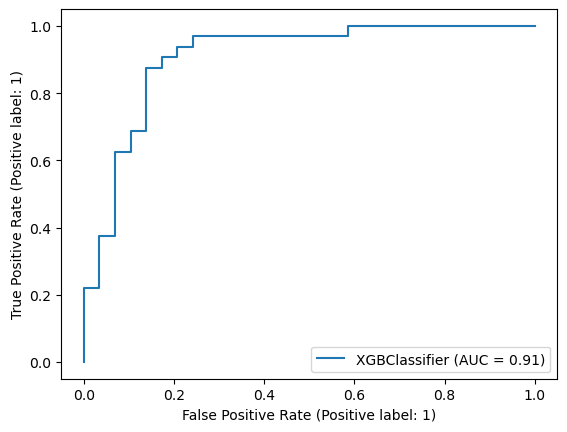

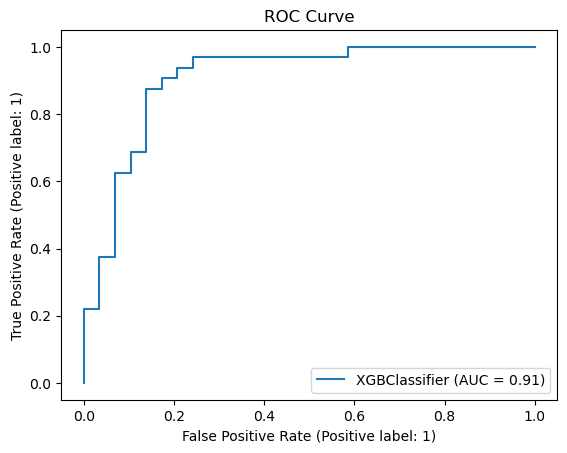

In [20]:
print("Training accuracy:", accuracy_score(model.predict(X_train), y_train))
y_pred = model.predict(X_test)
print("Test accuracy:", accuracy_score(y_pred, y_test))
roc_display = roc.from_estimator(model, X_test, y_test)
roc_display.plot()
plt.title('ROC Curve')
plt.show()


In [21]:
tuned_model = xgboost.XGBClassifier(gamma=3, learning_rate=0.05, use_label_encoder=False)
tuned_model.fit(X_train, y_train, eval_metric='error')


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training accuracy: 0.8925619834710744
Test accuracy: 0.819672131147541


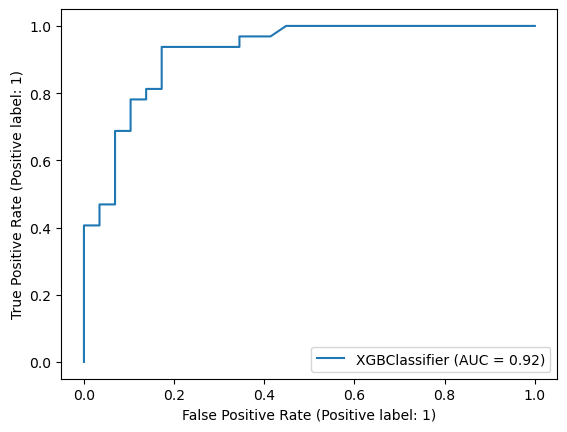

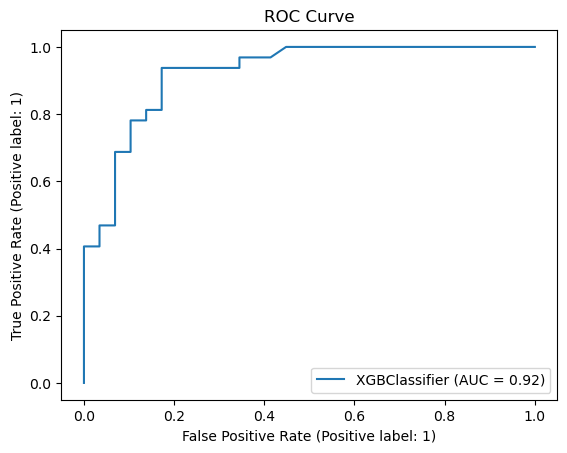

In [22]:
print("Training accuracy:", accuracy_score(tuned_model.predict(X_train), y_train))
y_pred_tuned = tuned_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_pred_tuned, y_test))
roc_display = roc.from_estimator(tuned_model, X_test, y_test)
roc_display.plot()
plt.title('ROC Curve')
plt.show()


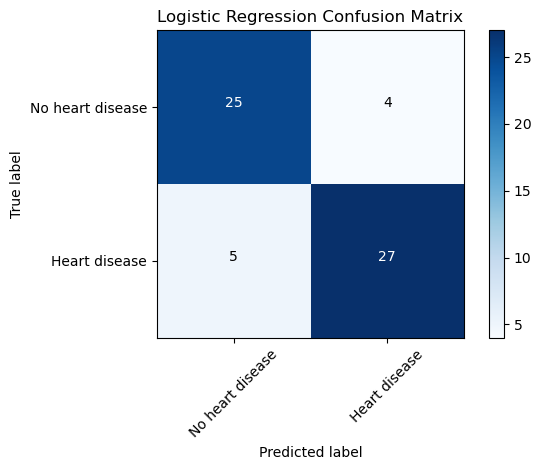

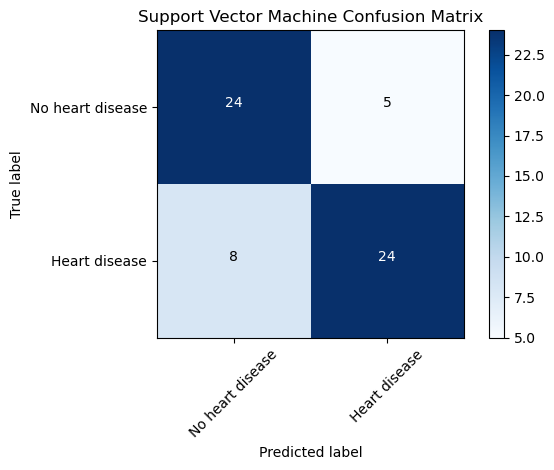

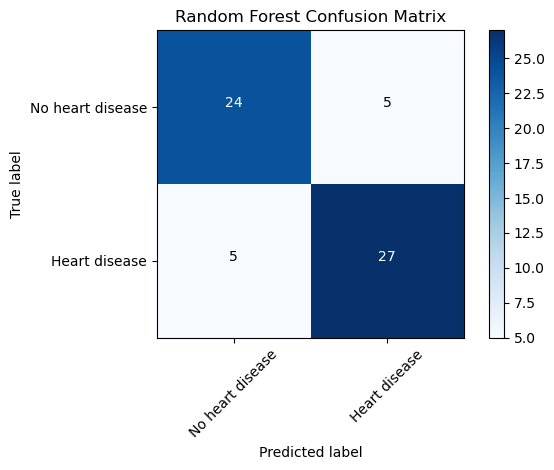

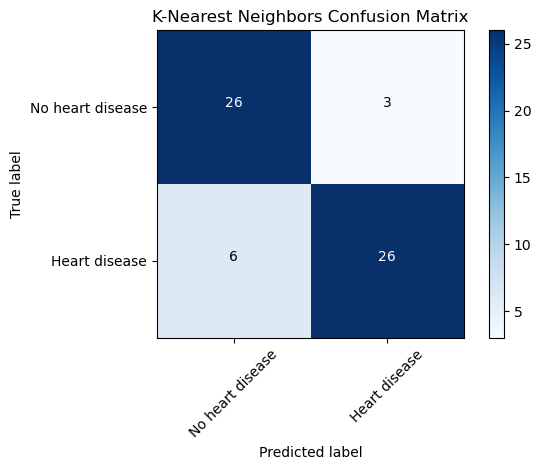

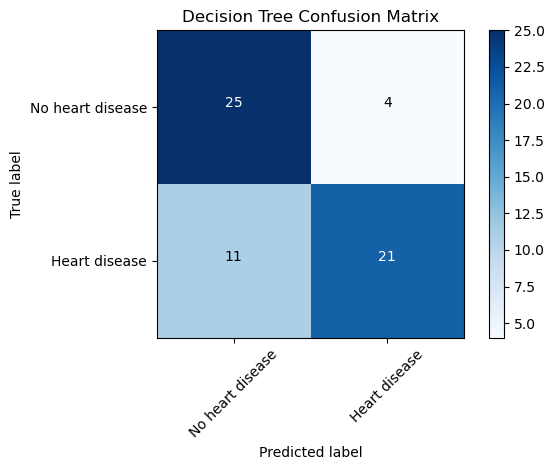

In [25]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(lr_conf_matrix, ['No heart disease', 'Heart disease'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()

plot_confusion_matrix(svm_conf_matrix, ['No heart disease', 'Heart disease'])
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

plot_confusion_matrix(rf_conf_matrix, ['No heart disease', 'Heart disease'])
plt.title('Random Forest Confusion Matrix')
plt.show()

plot_confusion_matrix(knn_conf_matrix, ['No heart disease', 'Heart disease'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

plot_confusion_matrix(dt_conf_matrix, ['No heart disease', 'Heart disease'])
plt.title('Decision Tree Confusion Matrix')
plt.show()



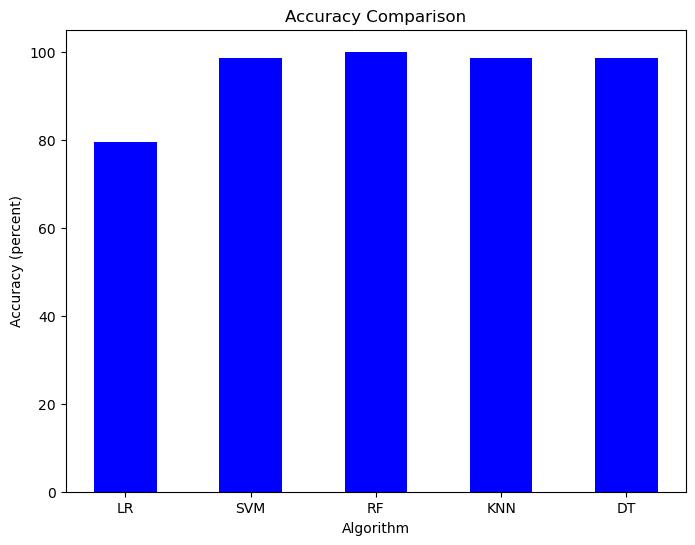

In [26]:
fig = plt.figure(figsize=(8, 6))
Algorithm = ['LR', 'SVM', 'RF', 'KNN', 'DT']
accuracy = [79.5, 98.5, 100, 98.5, 98.5]
plt.bar(Algorithm, accuracy, color='b', width=0.5)
plt.ylabel('Accuracy (percent)')
plt.xlabel('Algorithm')
plt.title('Accuracy Comparison')
plt.show()


In [27]:
input_data = (41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2)
input = np.array(input_data)
i = input.reshape(1, -1)
prediction = rf.predict(i)
if prediction[0] == 0:
    print("Person doesn't have heart attack")
else:
    print("Person has heart attack")


Person doesn't have heart attack
